# CALIDAD DE DATOS

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
from janitor import clean_names

#Automcompletar rápido
%config IPCompleter.greedy=True

#Desactivar notación científica
pd.options.display.float_format = '{:,.2f}'.format

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/pelop/OneDrive/Desktop/Curso Data Science Pedro/2 CURSO DATA SCIENCE/03_MACHINE_LEARNING/07_CASOS/03_RIESGOS'

Sustituir el nombre_fichero_datos.

In [3]:
nombre_fichero_datos = 'trabajo.csv'

Cargar los datos.

In [4]:
ruta_completa = ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_fichero_datos

df = pd.read_csv(ruta_completa,index_col='id_cliente')
df

,Unnamed: 0,empleo,antigüedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,...,id_prestamo,descripcion,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
id_cliente,,,,,,,,,,,,,,,,,,,,,
137387967,0,Hvac technician,3 years,"54,000.00",Source Verified,A,19.31,MORTGAGE,2.00,10.00,...,NaN,NaN,debt_consolidation,"15,000.00",7.21,36 months,464.60,"2,669.06",Current,0.00
4798121,1,"Target Promotions and Marketing,Inc",10+ years,"65,000.00",Not Verified,D,25.40,RENT,1.00,15.00,...,NaN,NaN,debt_consolidation,"10,000.00",17.77,36 months,360.38,"6,362.96",Charged Off,0.00
46641215,2,Banker,5 years,"135,000.00",Verified,A,14.68,RENT,0.00,19.00,...,NaN,NaN,debt_consolidation,"24,000.00",6.39,36 months,734.38,"24,000.00",Fully Paid,0.00
87998444,3,executive director,9 years,"188,000.00",Source Verified,B,11.69,MORTGAGE,3.00,15.00,...,NaN,NaN,credit_card,"27,000.00",8.99,60 months,560.35,"12,443.00",Current,0.00
131289518,5,NaN,10+ years,"72,777.00",Source Verified,D,24.74,MORTGAGE,2.00,10.00,...,NaN,NaN,home_improvement,"25,000.00",21.85,60 months,688.35,"2,811.27",Current,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129396054,199993,Field Manager,10+ years,"55,000.00",Source Verified,D,15.36,OWN,1.00,7.00,...,NaN,NaN,debt_consolidation,"14,400.00",17.47,60 months,361.53,"1,975.94",Current,0.00
119242742,199994,NaN,NaN,"20,000.00",Source Verified,C,8.02,RENT,0.00,5.00,...,NaN,NaN,debt_consolidation,"2,500.00",12.62,36 months,83.78,996.06,Late (31-120 days),0.00
121031962,199996,Owner & President,6 years,"111,697.00",Verified,B,16.63,MORTGAGE,2.00,10.00,...,NaN,NaN,other,"10,000.00",9.44,36 months,320.05,"4,388.51",Current,0.00


## VISIÓN GENERAL

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140000 entries, 137387967 to 53664762
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   140000 non-null  int64  
 1   empleo                       129647 non-null  object 
 2   antigüedad_empleo            130941 non-null  object 
 3   ingresos                     140000 non-null  float64
 4   ingresos_verificados         140000 non-null  object 
 5   rating                       140000 non-null  object 
 6   dti                          139892 non-null  float64
 7   vivienda                     140000 non-null  object 
 8   num_hipotecas                136927 non-null  float64
 9   num_lineas_credito           139997 non-null  float64
 10  porc_tarjetas_75p            135336 non-null  float64
 11  porc_uso_revolving           139893 non-null  float64
 12  num_cancelaciones_12meses    139989 non-null  float64

### Corrección

Eliminar la variable Unnamed: 0

In [6]:
df.drop(columns='Unnamed: 0',inplace=True)

## TIPOS DE DATOS

### Identificación

In [19]:
df.dtypes

empleo                          object
antigüedad_empleo               object
ingresos                       float64
ingresos_verificados            object
rating                          object
dti                            float64
vivienda                        object
num_hipotecas                  float64
num_lineas_credito             float64
porc_tarjetas_75p              float64
porc_uso_revolving             float64
num_cancelaciones_12meses      float64
num_derogatorios               float64
num_meses_desde_ult_retraso    float64
descripcion                     object
finalidad                       object
principal                      float64
tipo_interes                   float64
num_cuotas                      object
imp_cuota                      float64
imp_amortizado                 float64
estado                          object
imp_recuperado                 float64
dtype: object

Conclusiones:

* Todo correcto en cuanto a tipo de datos

## VALORES ÚNICOS

### Identificación

In [10]:
df.nunique().sort_values()

id_prestamo                        0
num_cuotas                         2
ingresos_verificados               3
vivienda                           6
num_cancelaciones_12meses          7
rating                             7
estado                             9
antigüedad_empleo                 11
finalidad                         14
num_derogatorios                  19
num_hipotecas                     25
num_lineas_credito                62
num_meses_desde_ult_retraso      130
porc_tarjetas_75p                168
tipo_interes                     585
porc_uso_revolving              1103
principal                       1466
dti                             5280
descripcion                     7845
imp_recuperado                 10600
ingresos                       11570
imp_cuota                      33602
empleo                         54485
imp_amortizado                 57564
dtype: int64

Conclusiones:

* id_prestamo con menos de 2 valores --> eliminar

### Corrección

In [11]:
df.drop(columns = 'id_prestamo', inplace = True)

## DUPLICADOS

### Identificación

In [12]:
df.duplicated().sum()

0

## SEPARAR NUMÉRICAS Y CATEGÓRICAS

### Categóricas

In [20]:
cat = df.select_dtypes(exclude = 'number').copy()

### Numéricas

In [21]:
num = df.select_dtypes(include='number').copy()

## GESTIÓN DE CATEGÓRICAS

### Nulos

#### Identificación

In [22]:
cat.isna().sum().sort_values(ascending = False)

descripcion             132132
empleo                   10353
antigüedad_empleo         9059
ingresos_verificados         0
rating                       0
vivienda                     0
finalidad                    0
num_cuotas                   0
estado                       0
dtype: int64

In [24]:
cat.descripcion.value_counts(dropna=False)

descripcion
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [25]:
cat.empleo.value_counts(dropna=False)

empleo
NaN                           10353
Teacher                        2468
Manager                        2174
Owner                          1376
Registered Nurse               1002
                              ...  
Admin Air dept. Clerk             1
South Jersey Newspapers           1
Rehabilitation director           1
Senior Health Care Analyst        1
Sr. Field Engineer                1
Name: count, Length: 54486, dtype: int64

In [26]:
cat.antigüedad_empleo.value_counts(dropna=False)

antigüedad_empleo
10+ years    46097
2 years      12420
< 1 year     11811
3 years      11315
1 year        9089
NaN           9059
5 years       8726
4 years       8523
6 years       6328
7 years       5891
8 years       5753
9 years       4988
Name: count, dtype: int64

Conclusiones:

* sustituir todas por valor 'desconocido'

#### Corrección

##### Imputar por un valor

###### Variables a imputar

In [27]:
var_imputar_desconocido = ['descripcion','empleo','antigüedad_empleo']

###### Imputar

In [28]:
cat[var_imputar_desconocido] = cat[var_imputar_desconocido].fillna('desconocido')

## GESTIÓN DE NUMÉRICAS

### Nulos

#### Identificación

In [29]:
num.isna().sum().sort_values(ascending = False)

num_meses_desde_ult_retraso    71834
porc_tarjetas_75p               4664
num_hipotecas                   3073
dti                              108
porc_uso_revolving               107
num_cancelaciones_12meses         11
num_lineas_credito                 3
num_derogatorios                   3
ingresos                           0
principal                          0
tipo_interes                       0
imp_cuota                          0
imp_amortizado                     0
imp_recuperado                     0
dtype: int64

Veamoslas con más detalle.

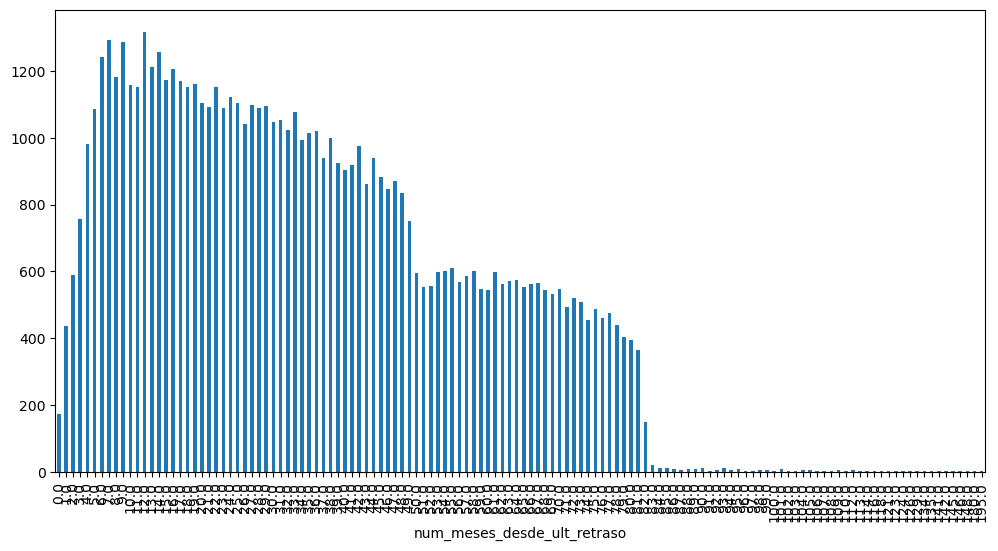

In [30]:
num.num_meses_desde_ult_retraso.value_counts().sort_index().plot.bar(figsize = (12,6));

Hay ceros, pero parecen pocos para una variable que implica retrasos.

Así que vamos a pensar que los nulos significan que no ha habido retrasos.

Y por tanto imputar por ceros.

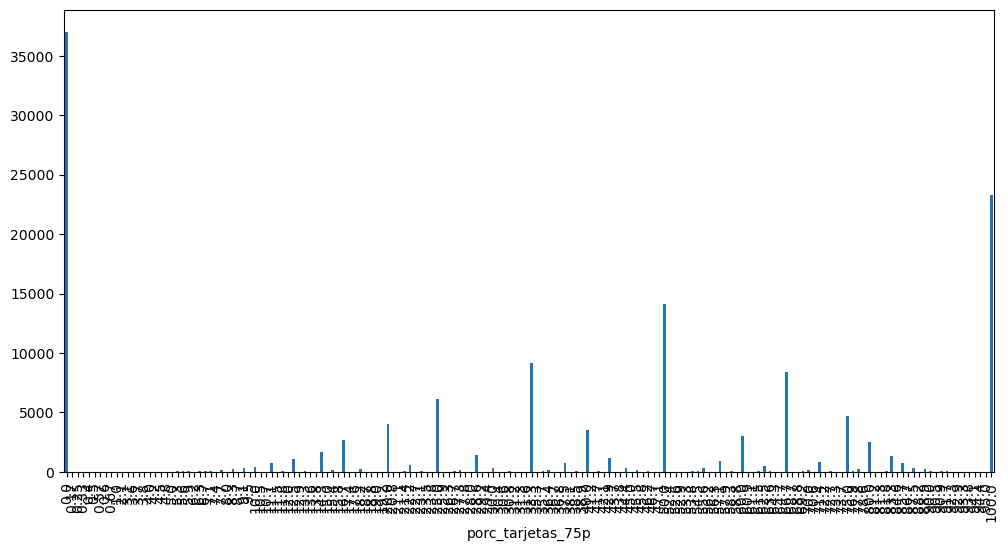

In [31]:
num.porc_tarjetas_75p.value_counts().sort_index().plot.bar(figsize = (12,6));

La categoría mayoritaria es cero.

Imputaremos por cero.

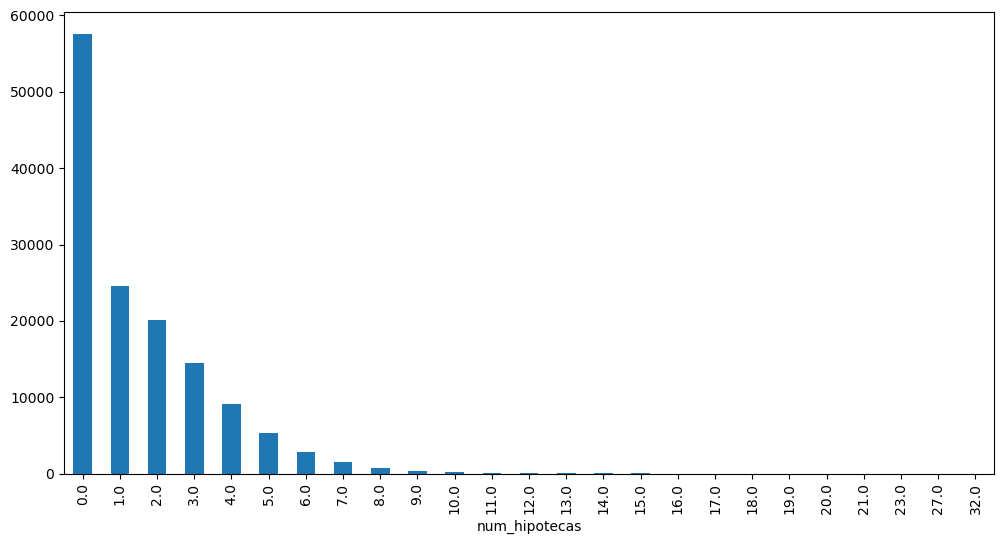

In [32]:
num.num_hipotecas.value_counts().sort_index().plot.bar(figsize = (12,6));

La categoría mayoritaria es cero.

Imputaremos por cero.

Conclusiones:

* imputar todas por ceros

#### Corrección

In [33]:
num.fillna(0,inplace=True)

### Atípicos

#### Por desviación típica

##### Identificación

###### Definir el número de desviaciones típicas

In [34]:
num_desv_tip = 4

###### Función que devuelve los índices de los atípicos

In [35]:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

###### Función que cuenta el número de atípicos

In [36]:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts().sort_index())

###### Variables a aplicar

In [37]:
var_atipicos_dt = ['ingresos','principal','imp_cuota','imp_recuperado']

###### Aplicar

In [38]:
for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


ingresos:

ingresos
445,000.00        1
447,000.00        1
450,000.00       38
453,000.00        1
454,189.00        1
                 ..
8,500,000.00      1
8,500,021.00      1
9,550,000.00      1
9,573,072.00      1
10,999,200.00     1
Name: count, Length: 130, dtype: int64

principal:

Series([], Name: count, dtype: int64)

imp_cuota:

imp_cuota
1,566.80    2
1,587.02    1
1,714.54    1
Name: count, dtype: int64

imp_recuperado:

imp_recuperado
3,207.44     1
3,207.86     1
3,208.00     1
3,208.50     1
3,209.03     1
            ..
24,383.06    1
26,172.99    1
27,478.64    1
27,657.68    1
33,666.34    1
Name: count, Length: 1545, dtype: int64


Revisamos con más detalle la variable ingresos.

In [39]:
num.ingresos.describe()

count      140,000.00
mean        78,422.85
std         91,641.06
min              0.00
25%         46,000.00
50%         65,000.00
75%         93,740.25
max     10,999,200.00
Name: ingresos, dtype: float64

##### Corrección

Eliminar los registros con ingresos superiores a 300.000$

*Cuidado: Si se eliminan registros hay que eliminarlos tanto de cat como de num*

###### Id de registros a eliminar

In [40]:
a_eliminar = num.loc[num.ingresos > 300000].index.values
a_eliminar

array([ 97629676,  30115373,  88149047,  96702950,  83678168, 128295694,
        57316403,  75468055, 104953803,  55380417,  60525500,  59101444,
        74703269, 101561119, 114093587, 121891976,    458760, 145133997,
        99967449,  74845067, 113905376,  91162705,  69127903, 134144676,
        79015002,  33371205,  88195703, 136270374, 114793732, 115048244,
         9746316,  89794872, 128843574,  75358546,  65038134,  70592833,
       142502569, 104959821, 107733336,  77517938,  93092543,  91131807,
          489907, 122689487,  57074442, 133401013,  60831304,  40942257,
       116881558, 115085050,   3630153,  78419419,  79390430, 141591423,
        67427919,  92659557, 138925364, 102523636, 125219862,  88921166,
       109743090,    225812, 131383380, 109322909, 141468030,  92035926,
        53252537, 144125851,  12938159, 107355068, 125518577, 120217704,
       104110402,  65795964,  59242936, 125737574, 132251779, 134479546,
       134323203, 104319520, 145242693,   2367546, 

###### Aplicar

In [41]:
cat = cat[~cat.index.isin(a_eliminar)]
num = num[~num.index.isin(a_eliminar)]

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en df, cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

### Definir los nombres de los archivos

In [42]:
ruta_trabajo = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'trabajo_resultado_calidad.pickle'
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_calidad.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_calidad.pickle'

### Guardar los archivos

In [43]:
df.to_pickle(ruta_trabajo)
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)